In [ ]:
#INF2178 Technical Assignment 3
#Name: KA YUEN LEE
#Student Number: 1010073974
#Professor: Shion Guha


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

%pip install pingouin
from pingouin import ancova

df=pd.read_csv("/content/INF2178_A3_data.csv")
df.head(4)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB


In [26]:
df['incomegroup'] = df['incomegroup'].astype('category')

print("Summary Statistics:\n", df.describe())

Summary Statistics:
        fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
count      11933.000000   11933.000000               11933.000000   
mean          35.954215      27.128244                  23.073694   
std           10.473130       9.120505                   7.396978   
min           21.010000      10.510000                   6.985000   
25%           29.340000      20.680000                  17.385000   
50%           34.060000      25.680000                  22.954000   
75%           39.890000      31.590000                  28.305000   
max          138.510000     115.650000                  47.691000   

       springreadingscore  springmathscore  springgeneralknowledgescore  \
count        11933.000000     11933.000000                 11933.000000   
mean            47.511178        37.799461                    28.235584   
std             14.327111        12.027753                     7.577457   
min             22.350000        11.900000               

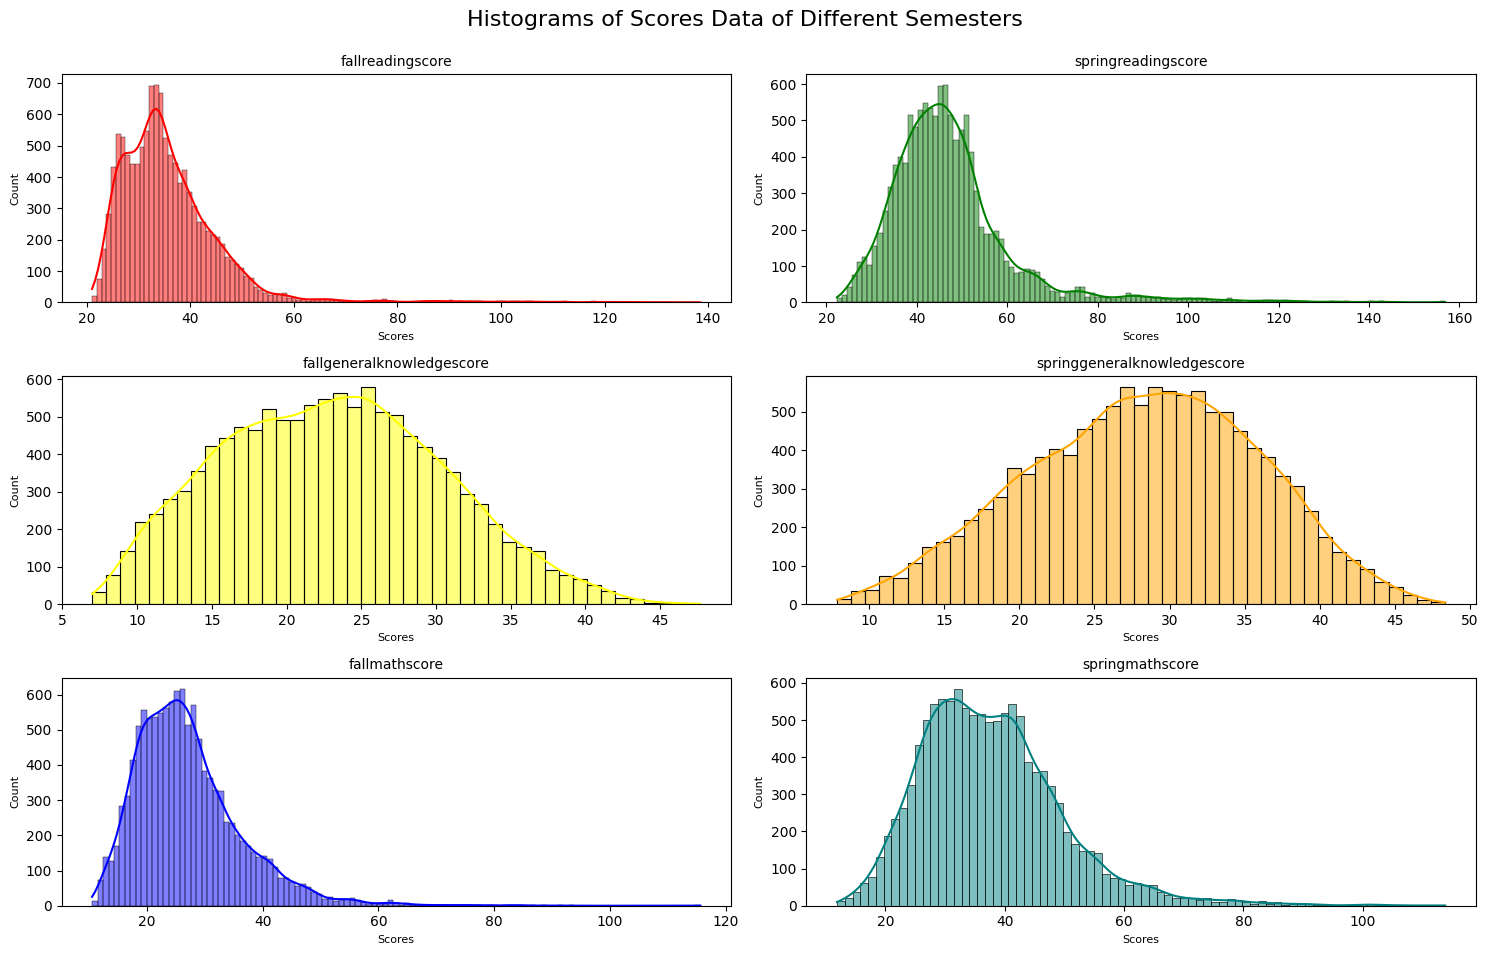

In [27]:
# Create a subplot
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Define the columns from the DataFrame to be used for each histogram
score_columns = ['fallreadingscore', 'springreadingscore', 'fallgeneralknowledgescore',
                 'springgeneralknowledgescore', 'fallmathscore', 'springmathscore']

# Set colors for each histogram
colors = ['red', 'green', 'yellow', 'orange', 'blue', 'teal']

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Create each histogram
for col, color, ax in zip(score_columns, colors, axs):
    # Plot the histogram with a density curve
    sns.histplot(df[col], kde=True, color=color, ax=ax)
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('Scores', fontsize=8)
    ax.set_ylabel('Count', fontsize=8)

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Add a main title
plt.suptitle('Histograms of Scores Data of Different Semesters', fontsize=16)

# Show the plot
plt.show()

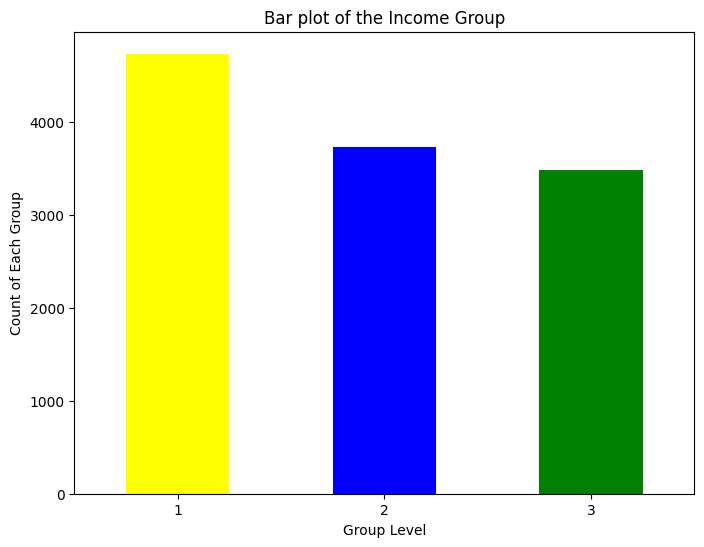

In [28]:
#Creat a bar plot for count the income group

income_group_counts = df['incomegroup'].value_counts()

#Create the bar plot
plt.figure(figsize=(8, 6))
income_group_counts.plot(kind='bar', color=['yellow', 'blue', 'green'])

# Add title and labels
plt.title('Bar plot of the Income Group')
plt.xlabel('Group Level')
plt.ylabel('Count of Each Group')
plt.xticks(rotation=0)

# Show the plot
plt.show()

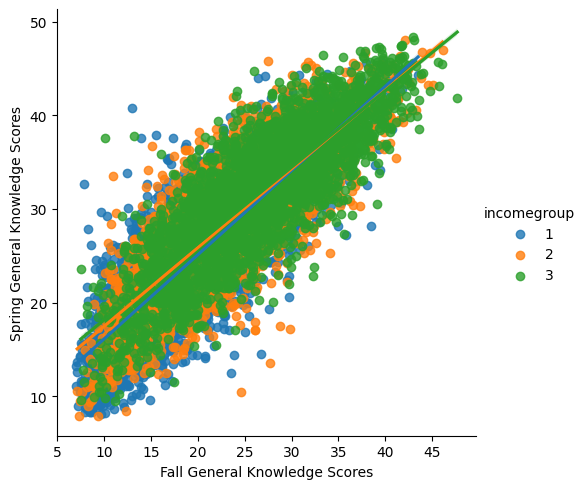

In [29]:
#Research question 1

#Creat a interaction plot
sns.lmplot(x = 'fallgeneralknowledgescore', y = 'springgeneralknowledgescore', hue = 'incomegroup', data = df)

#Set the labels
plt.xlabel('Fall General Knowledge Scores')
plt.ylabel('Spring General Knowledge Scores')

plt.show()

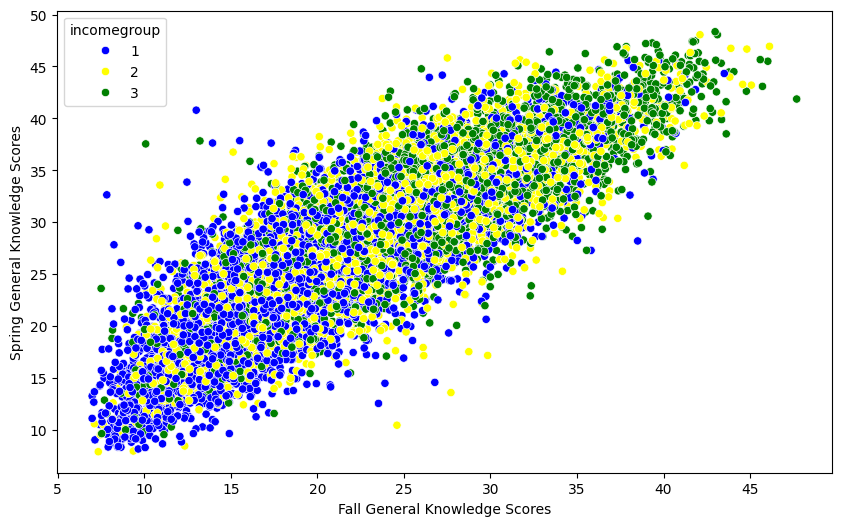

In [31]:
# Creat a scatter plot
high_identified_palette = ['blue','yellow','green']

# Set the size of figure
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="fallgeneralknowledgescore",y="springgeneralknowledgescore",hue="incomegroup",palette=high_identified_palette)
# set the labels
plt.xlabel('Fall General Knowledge Scores')
plt.ylabel('Spring General Knowledge Scores')

plt.show()

In [32]:
# Define the data for ANCOVA
ancova(data=df, dv='springgeneralknowledgescore',covar='fallgeneralknowledgescore',between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1756.904469,2,56.908040,2.525291e-25,0.009451
1,fallgeneralknowledgescore,411876.768316,1,26682.269841,0.000000e+00,0.691049
2,Residual,184140.179925,11929,NaN,NaN,NaN


In [33]:
# Perform the ANCOVA
modell = ols('springgeneralknowledgescore ~ incomegroup + fallgeneralknowledgescore', data=df).fit()
# print the summary of the model
print(modell.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.731
Model:                                     OLS   Adj. R-squared:                  0.731
Method:                          Least Squares   F-statistic:                 1.082e+04
Date:                         Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                                 05:44:39   Log-Likelihood:                -33259.
No. Observations:                        11933   AIC:                         6.653e+04
Df Residuals:                            11929   BIC:                         6.656e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [34]:
# Adding interaction term and fit the model
model_interaction = sm.formula.ols('springgeneralknowledgescore ~ incomegroup * fallgeneralknowledgescore',data=df).fit()

# print the summary of results
print(model_interaction.summary())

                                 OLS Regression Results                                
Dep. Variable:     springgeneralknowledgescore   R-squared:                       0.732
Model:                                     OLS   Adj. R-squared:                  0.732
Method:                          Least Squares   F-statistic:                     6524.
Date:                         Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                                 05:44:42   Log-Likelihood:                -33236.
No. Observations:                        11933   AIC:                         6.648e+04
Df Residuals:                            11927   BIC:                         6.653e+04
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------

In [35]:
# Conduct post-hoc analysis after ANCOVA
from statsmodels.stats.multicomp import MultiComparison

multicomp = MultiComparison(df['springgeneralknowledgescore'], df['incomegroup'])
tukey_res = multicomp.tukeyhsd()
# print the summary of result
print(tukey_res.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   4.0741   0.0 3.7112  4.437   True
     1      3   6.4982   0.0 6.1281 6.8683   True
     2      3   2.4241   0.0 2.0335 2.8147   True
-------------------------------------------------


<Figure size 1000x500 with 0 Axes>

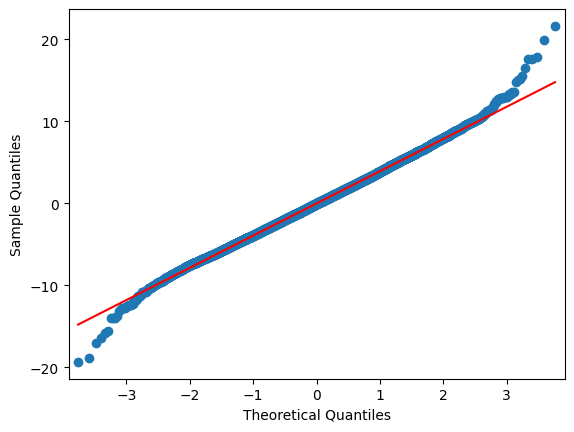

In [36]:
import statsmodels.formula.api as smf

# Create the modelling and test assumptions (Normality, Homogeneity of Variance)
model1 = smf.ols('springgeneralknowledgescore ~ C(incomegroup)+fallgeneralknowledgescore',data=df).fit()
residual = model1.resid

# Using QQ-plot to test the First Assumption: Normality
# set-up the figure size
plt.figure(figsize=(10,5))
sm.qqplot(residual, line='s')

plt.show()



In [37]:
#Assumption 1: residuals are normally distributed: Shapiro Wilk test
shapiro_test = stats.shapiro(residual)
shapiro_test

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9980394840240479, pvalue=3.155014791089705e-11)

In [38]:
#Assumption 2: variances are homoegenous:
p_value = stats.levene(df['springgeneralknowledgescore'][df['incomegroup'] == 1],
             df['springgeneralknowledgescore'][df['incomegroup'] == 2],
             df['springgeneralknowledgescore'][df['incomegroup'] == 3])

# print the result
print("Levene's test P-value:",p_value)

Levene's test P-value: LeveneResult(statistic=9.405765903621088, pvalue=8.286000485876772e-05)


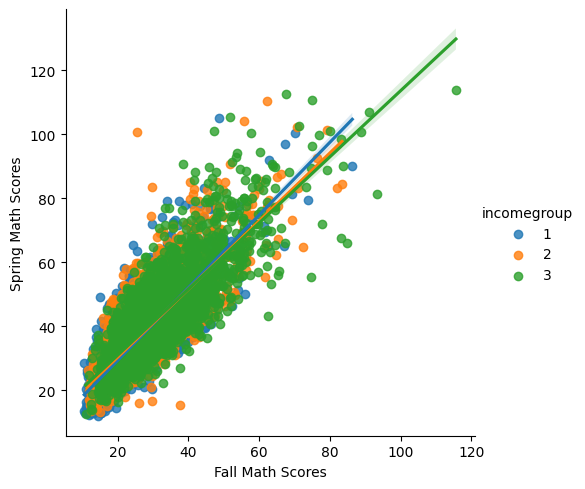

In [39]:
#Research question 2

#Creat a interaction plot
sns.lmplot(x = 'fallmathscore', y = 'springmathscore', hue = 'incomegroup', data = df)

#Set the labels
plt.xlabel('Fall Math Scores')
plt.ylabel('Spring Math Scores')

plt.show()

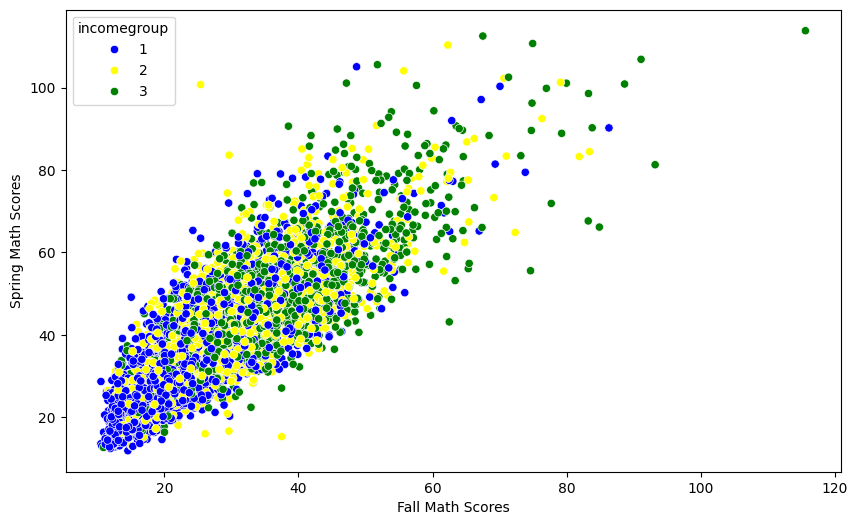

In [40]:
# Creat a scatter plot
high_identified_palette = ['blue','yellow','green']

# Set the size of figure
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="fallmathscore",y="springmathscore",hue="incomegroup",palette=high_identified_palette)
# set the labels
plt.xlabel('Fall Math Scores')
plt.ylabel('Spring Math Scores')

plt.show()

In [41]:
# Define the data for ANCOVA
ancova(data=df, dv='springmathscore',covar='fallmathscore',between='incomegroup')

,Source,SS,DF,F,p-unc,np2
0,incomegroup,1.712758e+03,2,18.523585,9.284861e-09,0.003096
1,fallmathscore,1.026489e+06,1,22203.081238,0.000000e+00,0.650505
2,Residual,5.514994e+05,11929,NaN,NaN,NaN


In [42]:
# Perform the ANCOVA
modell = ols('springmathscore ~ incomegroup + fallmathscore', data=df).fit()
# print the summary of the model
print(modell.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     8469.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        05:45:22   Log-Likelihood:                -39804.
No. Observations:               11933   AIC:                         7.962e+04
Df Residuals:                   11929   BIC:                         7.965e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.2011      0.199  

In [43]:
# Adding interaction term and fit the model
model_interaction = sm.formula.ols('springmathscore ~ incomegroup * fallmathscore', data=df).fit()

# print the summary of results
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:        springmathscore   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     5103.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):               0.00
Time:                        05:45:31   Log-Likelihood:                -39786.
No. Observations:               11933   AIC:                         7.958e+04
Df Residuals:                   11927   BIC:                         7.963e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [44]:
# Conduct post-hoc analysis after ANCOVA
from statsmodels.stats.multicomp import MultiComparison

multicomp = MultiComparison(df['springmathscore'], df['incomegroup'])
tukey_res = multicomp.tukeyhsd()
# print the summary of result
print(tukey_res.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     1      2   4.5816   0.0 3.9911 5.1722   True
     1      3   8.5288   0.0 7.9267  9.131   True
     2      3   3.9472   0.0 3.3116 4.5828   True
-------------------------------------------------


<Figure size 1000x500 with 0 Axes>

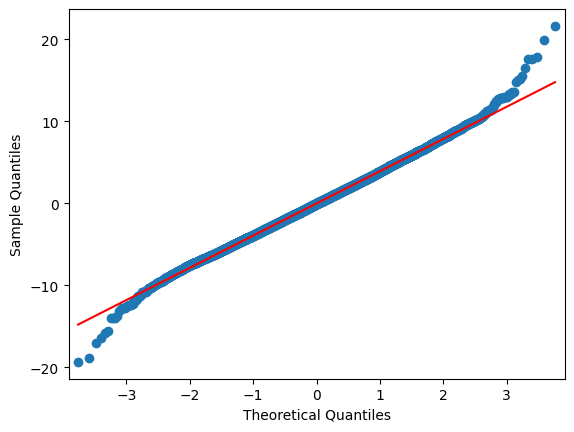

In [45]:
import statsmodels.formula.api as smf

# Create the modelling and test assumptions (Normality, Homogeneity of Variance)
model2 = smf.ols('springmathscore ~ C(incomegroup)+fallmathscore',data=df).fit()
residual1 = model2.resid

# Using QQ-plot to test the First Assumption: Normality
# Set the figure size
plt.figure(figsize=(10,5))
sm.qqplot(residual, line='s')

plt.show()


In [46]:
#Assumption 1: residuals are normally distributed: Shapiro Wilk test
shapiro_test = stats.shapiro(residual1)
shapiro_test

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9649319052696228, pvalue=0.0)

In [47]:
#Assumption 2: variances are homoegenous:
p_value = stats.levene(df['springmathscore'][df['incomegroup'] == 1],
             df['springmathscore'][df['incomegroup'] == 2],
             df['springmathscore'][df['incomegroup'] == 3])

# print the result
print("Levene's test P-value:",p_value)

Levene's test P-value: LeveneResult(statistic=18.899850238111785, pvalue=6.380804527269148e-09)
